<a href="https://colab.research.google.com/github/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main/07/0713.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install umap-learn umap-learn[plot]
!wget -O 0713_soybean_data_use.csv https://github.com/spencer18001/Clustering-And-Dimensionality-Reduction---Deep-Dive/blob/main/data/0713_soybean_data_use.csv?raw=1

## Clustering categorical data with K-means and one hot encoding

In [ ]:
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import adjusted_rand_score

from sklearn.cluster import KMeans

# yellowbrick libs
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

import umap
import umap.plot as uplot

plt.rcParams["figure.figsize"] = (11,7)
sns.set_theme()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn

### Soyabeen small dataset

A dataset of soybean plant observations, including information on plants infested by one of four diseases.

- Dataset contains 47 instances.
- Each instance represents a single plant.
- Characterized by 35 attributes.
- Attributes are categorical.
- Attributes mostly capture various symptoms like leaf spots, root rot, mold growth, seed damage, etc.

Citation:

- Michalski,R.. (1987). Soybean (Small). UCI Machine Learning Repository. https://doi.org/10.24432/C5DS3P.

The goal of the dataset is to diagnose four different types of diseases:
- D1 (diaporthe stem canker)
- D2 (charcoal rot)
- D3 (rhizoctonia root rot)
- D4 (phytophthora root rot)

### Features:


1. **Date**: Represents the specific time of soybean sample collection, crucial for understanding seasonal impacts on plant health.
  
2. **Plant Stand**: Qualitatively assesses the uniformity and health of the plant population, informing about possible early-stage diseases or growth issues.

3. **Precipitation**: Captures the water level conditions around the sampling time, providing insights into potential water-related stress factors.
  
4. **Temperature**: Reflects the average climatic temperature at the time of observation, crucial for assessing environmental stress conditions.

5. **Hail**: A binary indicator that identifies whether the plant has undergone hail damage, which could affect overall plant health.

6. **Crop Hist**: Denotes the type of crop previously grown in the same field, essential for understanding soil quality and disease carryover risks.

7. **Area Damaged**: Quantifies the spatial extent of observable damage, useful for gauging the disease's progression.

8. **Severity**: Categorizes the observable symptoms into different severity levels, aiding in diagnostic precision.

9. **Seed Tmt**: Indicates whether the seeds underwent any treatment before planting, offering clues to possible resistance against diseases.

10. **Germination**: Measures the proportion of seeds that successfully sprouted, a potential early indicator of crop health.

11. **Plant Growth**: Describes the overall plant morphology, allowing for assessments of nutritional status or genetic factors.

12. **Leaves**: Evaluates leaf condition, which is often the first site of symptom expression in many plant diseases.

13. **Leafspots Halo**: Details the characteristics of leaf spots, such as color and shape, aiding in disease identification.

14. **Leafspots Margins**: Describes the edge characteristics of any leaf spots, essential for distinguishing between multiple diseases.

15. **Leafspot Size**: Categorizes the dimensions of leaf spots, crucial for severity assessment.

16. **Leaf Shread**: A binary flag for the presence of leaf shredding, often indicative of mechanical damage or specific diseases.

17. **Leaf Malf**: A binary indicator for the presence of deformities in the leaves, which may suggest genetic or environmental stresses.

18. **Leaf Mild**: Indicates the presence or absence of mildew on the leaves, a common symptom for various fungal diseases.

19. **Stem**: Assesses the stem's physical condition, another critical site for symptom manifestation.

20. **Lodging**: A binary flag that notes whether the plant is upright or has fallen, often indicative of structural weakness or disease.

21. **Stem Cankers**: Details the characteristics of stem cankers if present, essential for identifying specific stem diseases.

22. **Canker Lesion**: Documents the type and appearance of canker lesions on the stem, crucial for diagnostic accuracy.

23. **Fruiting Bodies**: A binary indicator of the presence of fruiting bodies, suggesting advanced stages of certain fungal diseases.

24. **External Decay**: Flags the presence of decay on the plant's exterior, indicative of severe fungal or bacterial infection.

25. **Mycelium**: A binary indicator for the presence of fungal mycelium, a sign of fungal diseases.

26. **Int Discolor**: Flags internal discoloration, often indicative of systemic infections.

27. **Sclerotia**: Indicates the presence of sclerotial bodies, commonly associated with advanced fungal diseases.

28. **Fruit Pods**: Evaluates the overall health of the fruit pods, crucial for assessing the final yield quality.

29. **Fruit Spots**: Documents any spotting conditions on the fruit, useful for identifying fruit-specific diseases.

30. **Seed**: Examines seed health, important for both yield quality and disease diagnostics.

31. **Mold Growth**: A binary flag for the presence of mold, often indicative of storage conditions or late-stage diseases.

32. **Seed Discolor**: Flags any discoloration in the seeds, a symptom of specific seed-borne diseases.

33. **Seed Size**: Categorizes seed dimensions, providing insights into nutritional conditions and disease impacts.

34. **Shriveling**: Flags the presence of seed shriveling, indicative of dehydration or specific diseases.

35. **Roots**: Assesses root health, providing insights into soil-borne diseases and nutritional deficiencies.

In [ ]:
soybean_path = '0713_soybean_data_use.csv'
soy_df = pd.read_csv(soybean_path)

In [ ]:
soy_df.head()
# bunch of categorical features

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,sclerotia,fruit-pods,fruit spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots,class
0,august,normal,gt-norm,norm,no,same-lst-yr,scattered,pot-severe,none,lt-80%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
1,september,normal,gt-norm,norm,yes,same-lst-sev-yrs,low-areas,pot-severe,fungicide,lt-80%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
2,july,normal,gt-norm,norm,yes,same-lst-two-yrs,scattered,severe,fungicide,80-89%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
3,october,normal,gt-norm,norm,yes,same-lst-yr,low-areas,pot-severe,none,90-100%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker
4,august,normal,gt-norm,norm,yes,same-lst-sev-yrs,scattered,severe,none,lt-80%,...,absent,norm,dna,norm,absent,absent,norm,absent,norm,diaporthe-stem-canker


In [ ]:
soy_df.isna().sum().sum()

0

In [ ]:
unique_vals_series = soy_df.nunique()
unique_vals_series
# certain features only have a single category,
# and these features are of no use because we cannot use them to distinguish between our samples

,0
date,7
plant-stand,2
precip,3
temp,3
hail,2
crop-hist,4
area-damaged,4
severity,2
seed-tmt,2
germination,3


In [ ]:
remove_cols = list(unique_vals_series[unique_vals_series==1].index)
remove_cols

['plant-growth',
 'leafspots-halo',
 'leafspots-marg',
 'leafspot-size',
 'leaf-shread',
 'leaf-malf',
 'leaf-mild',
 'stem',
 'fruit spots',
 'seed',
 'mold-growth',
 'seed-discolor',
 'seed-size',
 'shriveling']

In [ ]:
# Extract disease column into new label variable
label = soy_df['class'] # the last column 'class' is a ground truth

# Remove class column and columns having only single unique value
soy_df = soy_df.drop(columns=['class']+remove_cols)

In [ ]:
# Print unique value of each label
label.value_counts()

,count
class,
phytophthora-rot,17
diaporthe-stem-canker,10
charcoal-rot,10
rhizoctonia-root-rot,10


### K-means clustering

In [ ]:
# Convert categorical features into numerical features using one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
encoded_features = encoder.fit_transform(soy_df)

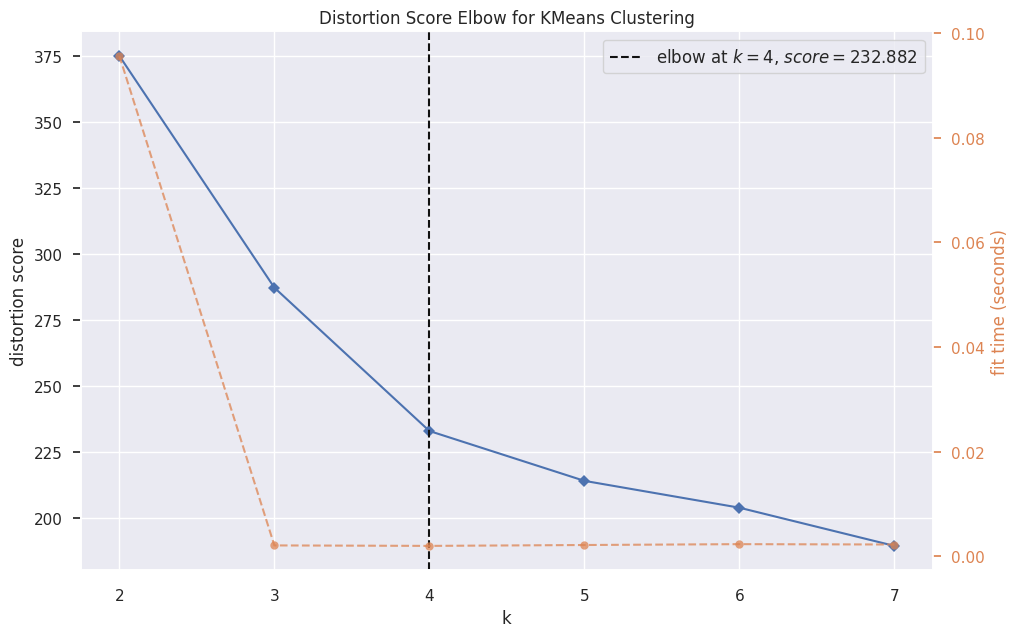

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(n_init='auto', random_state=42)

visualizer = KElbowVisualizer(model, k=(2,3,4,5,6,7))
visualizer.fit(encoded_features)
visualizer.show()

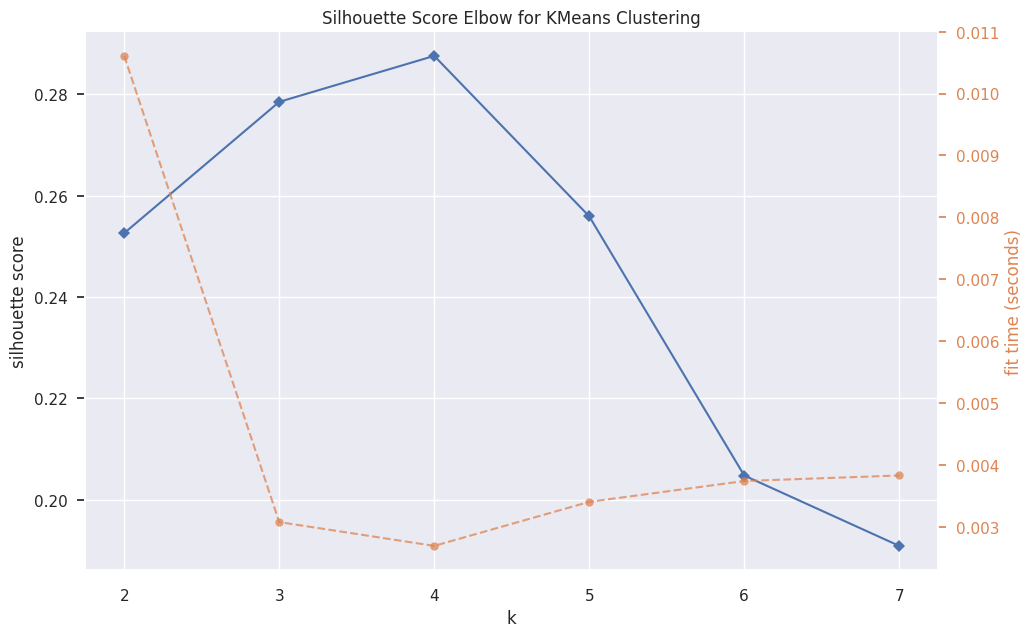

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(n_init='auto', random_state=42)

visualizer = KElbowVisualizer(model, k=(2,3,4,5,6,7), metric='silhouette', locate_elbow=False)
visualizer=visualizer.fit(encoded_features)
visualizer.show()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/plot.py:449: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(points[:, 0], points[:, 1], s=point_size, c=color)


<Axes: >

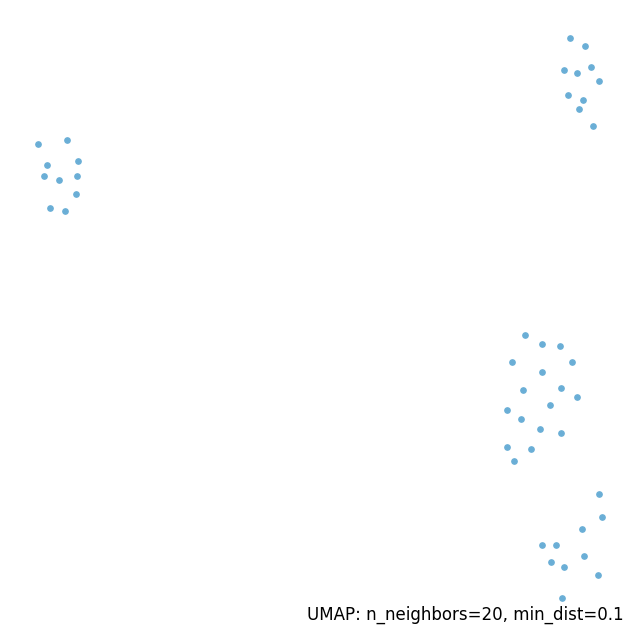

In [ ]:
# Embed with umap
umap_model = umap.UMAP(n_neighbors=20, n_components=2, random_state=42, metric='euclidean')
umap_emb_data = umap_model.fit_transform(encoded_features)

uplot.points(umap_model)
# 4 groups of data points

/usr/local/lib/python3.10/dist-packages/datashader/transfer_functions/__init__.py:332: RuntimeWarning: invalid value encountered in divide
  scaled_data = (data - span[0])/(span[1] - span[0])


<Axes: >

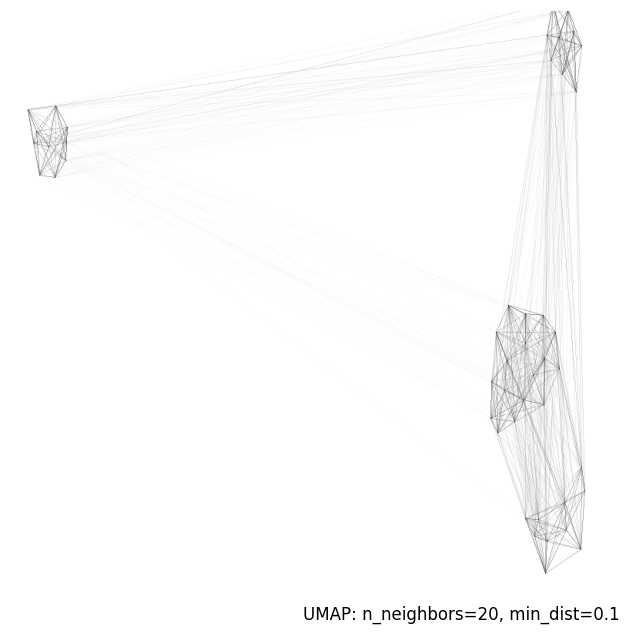

In [ ]:
umap.plot.connectivity(umap_model, show_points=True)
# these clusters are nicely interconnected,
# meaning that the distances between these groups are useful

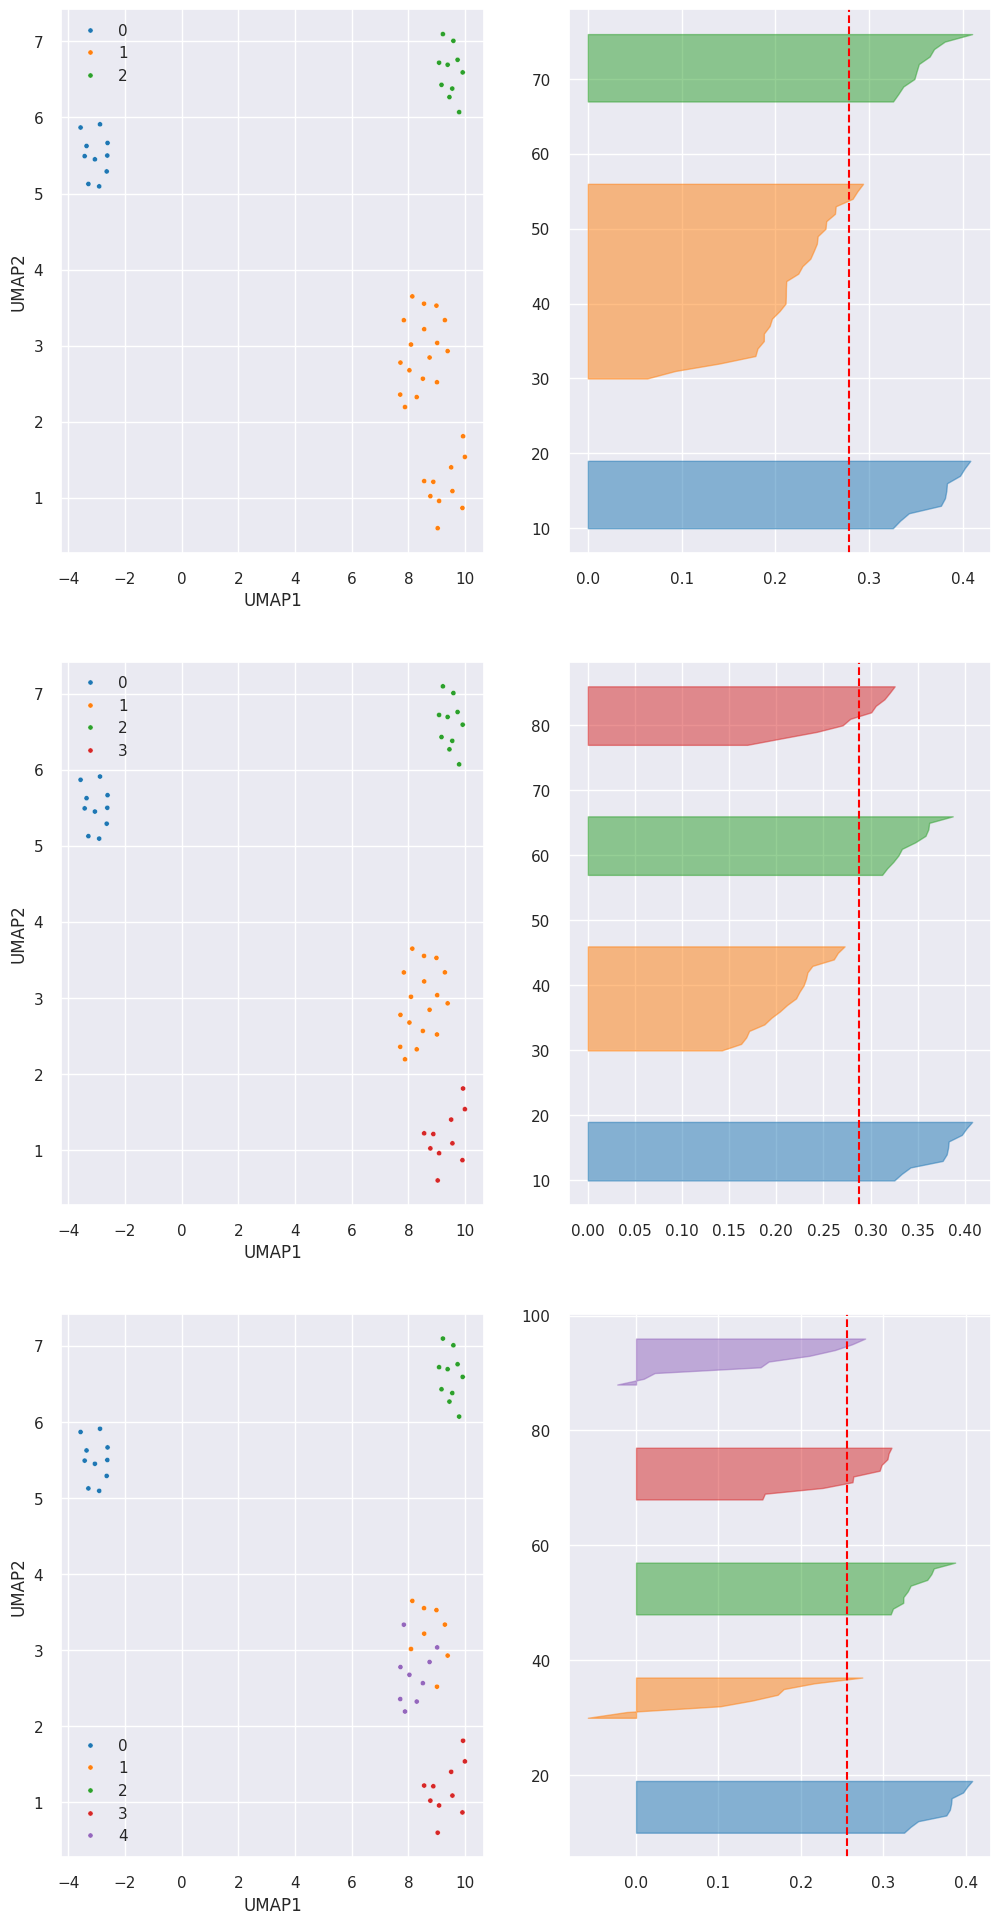

In [ ]:
# Perform clustering for multiple k
candidate_k = [3,4,5]
tab10 = list(matplotlib.colormaps['tab10'].colors)

fig, axs = plt.subplots(
    len(candidate_k), 2,
    figsize=(12, 24)
)

cluster_label_dict = {}
for i, num_clust in enumerate(candidate_k):
    # Perform clustering for current number of clusters
    kmeans = KMeans(n_clusters=num_clust, n_init='auto', random_state=42)
    kmeans.fit(encoded_features)

    sns.scatterplot(
        x=umap_emb_data[:,0],
        y=umap_emb_data[:,1],
        hue=kmeans.labels_,
        ax=axs[i, 0],
        s=14, palette='tab10'
    )

    axs[i,0].set_xlabel('UMAP1')
    axs[i,0].set_ylabel('UMAP2')

    visualizer = SilhouetteVisualizer(
        kmeans,
        is_fitted=True,
        colors=tab10,
        ax=axs[i, 1]
    )
    visualizer = visualizer.fit(encoded_features)

    cluster_label_dict[num_clust] = kmeans.labels_
# all the clusters are stable
# k=4, we have the highest overall silhouette scores

In [ ]:
kmeans = KMeans(n_clusters=4, n_init='auto', random_state=42)
cluster_labels = kmeans.fit_predict(encoded_features)

adjusted_rand_score(label, cluster_labels)
# k-means algorithm has managed to completely capture the structure of this data set

1.0